In [1]:
# Import libraries
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlretrieve

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

## Download assets

In [2]:
def download_and_unzip(url, save_path):
  print(f"Downloading and extracting assests....", end="")

  # Downloading zip file using urllib package.
  urlretrieve(url, save_path)

  try:
    # Extracting zip file using the zipfile package.
    with ZipFile(save_path) as z:
        # Extract ZIP file contents in the same directory.
      z.extractall(os.path.split(save_path)[0])

    print("\nDone")

  except Exception as e:
    print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/48hboi1m4crv1tl/opencv_bootcamp_assets_NB3.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB3.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
  download_and_unzip(URL, asset_zip_path)

Done


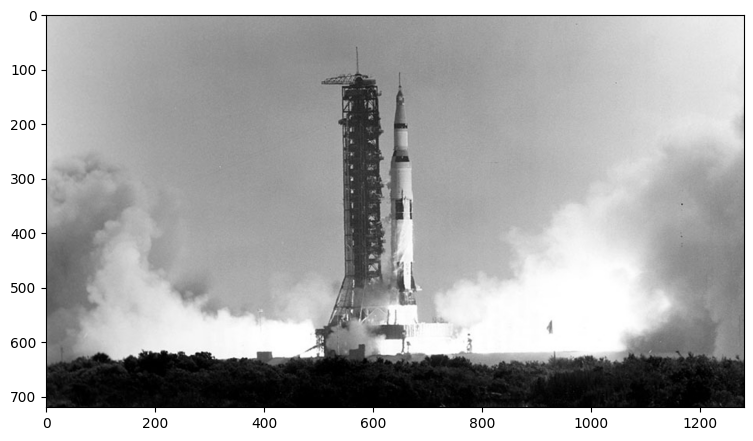

In [10]:
image = cv2.imread("Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:, :, ::-1])

## Drawing a line on an image

**Function Syntax**

- img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

- `img`: The output image that has been annotated.

The function has 4 required arguments:

- `img`: Image on which we will draw a line

- `pt1`: First point(x,y location) of the line segment

- `pt2`: Second point of the line segment

- `color`: Color of the line which will be drawn

Other optional arguments that are important for us to know include:

- `thickness`: Integer specifying the line thickness. Default value is 1.

- `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

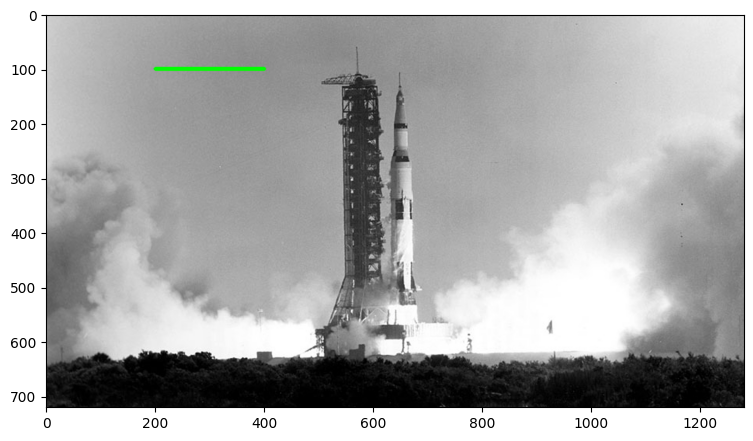

In [13]:
image_line = image.copy()

# The line starts from (200,100) and ends at (400,100)
# The color of the line is GREEN (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

cv2.line(image_line, (200, 100), (400, 100), color=(0, 255, 0), thickness=5, lineType=cv2.LINE_AA)

plt.imshow(image_line[:, :, ::-1])

## Drawing a circle

- img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has 4 required arguments:

- `img`: Image on which we will draw a line

- `center`: Center of the circle

- `radius`: Radius of the circle

- `color`: Color of the circle which will be drawn

Next, let's check out the (optional) arguments which we are going to use quite extensively.

- `thickness`: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled circle.

- `lineType`: Type of the circle boundary. This is exact same as lineType argument in cv2.line

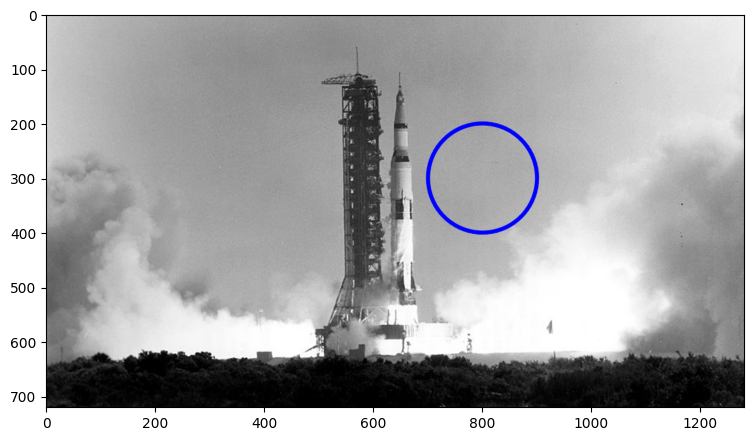

In [16]:
image_circle = image.copy()

cv2.circle(image_circle, center=(800, 300), radius=100, color=(255, 0, 0), thickness=5, lineType=cv2.LINE_AA)

plt.imshow(image_circle[:, :, ::-1])

## Drawing a rectangle

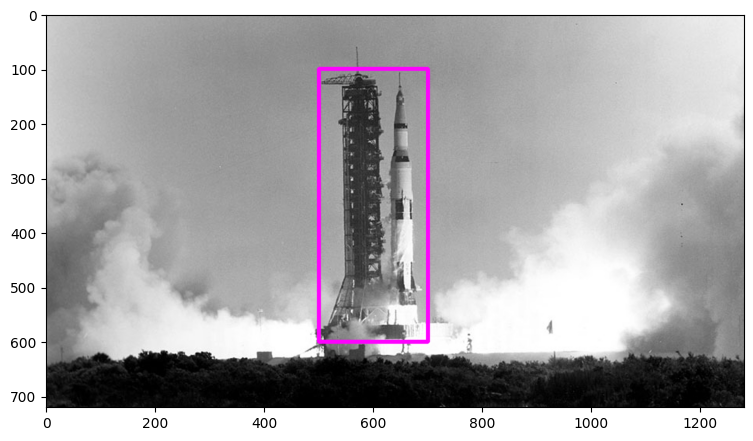

In [20]:
image_rectangle = image.copy()

cv2.rectangle(image_rectangle, (500, 100), (700, 600), (255, 0, 255), 5, cv2.LINE_AA)

plt.imshow(image_rectangle[:, :, ::-1])

## Adding text

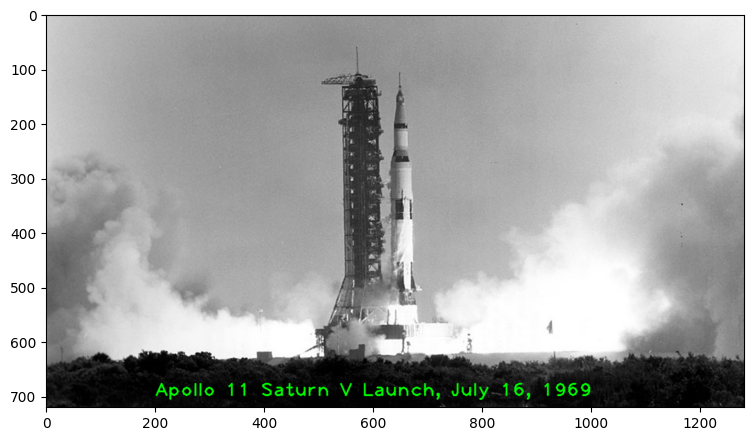

In [21]:
imageText = image.copy()
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

plt.imshow(imageText[:, :, ::-1])

## Questions

#### 1. Which of the following line types is not supported by `cv2.line`?

`cv2.LINE_16`

ref.:

https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777

#### 2. The purpose of the `pt1` and `pt2` parameters in `cv2.rectangle` is:

To specify the coordinates of the top-left and bottom-right corners of the rectangle

#### 3. What happens if the specified `fontScale` in `cv2.putText()` is negative?

The text will be drawn upside down

See image below, with a `fontScale = -2.3`

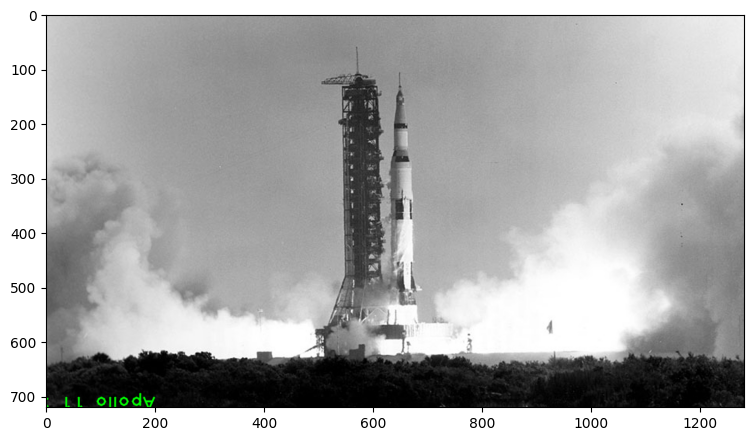

In [22]:
imageText = image.copy()
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = -2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

plt.imshow(imageText[:, :, ::-1])

#### 4. Which of the following is expected when `thickness = -2` is passed in `cv2.circle()`?

The color fills the complete circle

See below image when `thickness = -2`


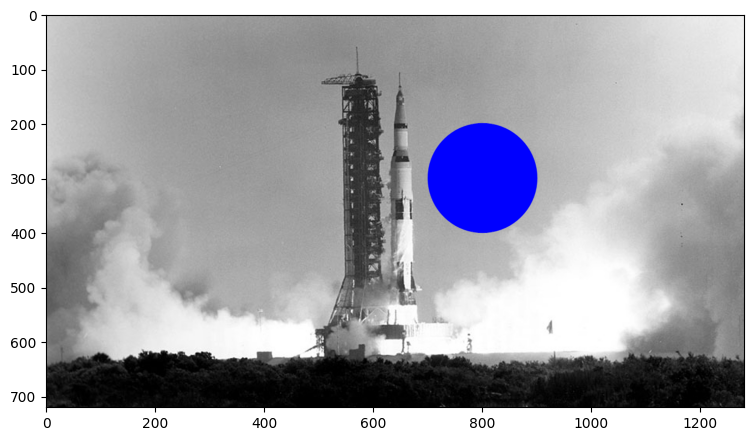

In [24]:
image_circle = image.copy()

cv2.circle(image_circle, center=(800, 300), radius=100, color=(255, 0, 0), thickness=-2, lineType=cv2.LINE_AA)

plt.imshow(image_circle[:, :, ::-1])

#### 5. When the `thickness` parameter is set to a negative value in `cv2.rectangle`, then:

The rectangle is filled with color instead of being outlined

See below image when `thickness = -5`

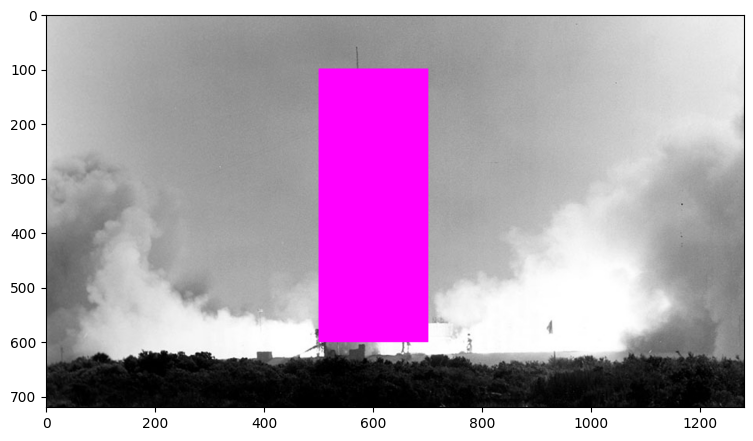

In [25]:
image_rectangle = image.copy()

cv2.rectangle(image_rectangle, (500, 100), (700, 600), (255, 0, 255), -5, cv2.LINE_AA)

plt.imshow(image_rectangle[:, :, ::-1])